In [5]:
#import

import numpy as np
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import json
import os
from torchvision.io import read_image

In [7]:
os.listdir()

['.ipynb_checkpoints',
 'cat_to_name.json',
 'EDA.ipynb',
 'model.py',
 'model1.ipynb',
 'test',
 'train',
 'utils.py',
 'valid',
 '__pycache__']

In [8]:
root_dir = '.'
label_map_path = os.path.join(root_dir,'cat_to_name.json')

In [9]:
with open(label_map_path,'r') as f:
    cat_to_name = json.load(f)

In [10]:
def show_cat_name(cat_num,print_bool=True):
    
    assert cat_num<=102, "Category number must be in between 1 and 102"
    
    root_dir = '.'
    label_map_path = os.path.join(root_dir,'cat_to_name.json')
    with open(label_map_path,'r') as f:
        cat_to_name = json.load(f)
    cat_name = cat_to_name[str(cat_num)]
    if print_bool:
        print(f"Category {cat_num} is of {cat_name}")
    else:    
        return cat_name

In [11]:
show_cat_name(12)

Category 12 is of colt's foot


In [12]:
def no_examples(cat_num,print_bool=True,dataset='train'):
    
    assert dataset in ['train','valid'] , "dataset = 'train' or 'valid'"
    
    root_dir = '.'
    cat_path = os.path.join(root_dir,dataset,str(cat_num))
    cat_name = show_cat_name(cat_num,print_bool=False)
    num_files = len([name for name in os.listdir(cat_path)])
    if print_bool:
        print(f"There are {num_files} images in category of {cat_name} ")
    else:
        return num_files

In [13]:
cat_examp = [{cat_num,no_examples(cat_num = cat_num,print_bool=False)} for cat_num in range(1,103)]
no_examp = [no_examples(cat_num = cat_num,print_bool=False) for cat_num in range(1,103)]

In [14]:
print(f"There are total {sum(no_examp)} images in the training dataset")

There are total 6552 images in the training dataset


In [15]:
no_examp_valid = [no_examples(cat_num = cat_num,print_bool=False,dataset='valid') for cat_num in range(1,103)]
print(f"There are total {sum(no_examp_valid)} images in the validation dataset")

There are total 818 images in the validation dataset


<AxesSubplot:>

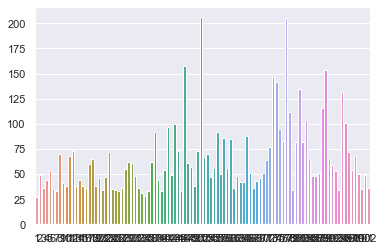

In [16]:
sns.set()
sns.barplot(x = [cat_num for cat_num in range(1,103)],y=no_examp)

In [17]:
print(f"There are atmost {max(no_examp)} images in a single class")    

There are atmost 206 images in a single class


In [18]:
from PIL import Image


def show_im(cat_num,im_no=1,dataset='train',print_dim=True):
    
    assert dataset in ['train','valid'] , "dataset = 'train' or 'valid'"
    
    
    no_examp = no_examples(cat_num,print_bool=False,dataset=dataset)
    assert im_no<=no_examp, "Image number out of range"
    
    
    root_dir = '.'
    cat_path = os.path.join(root_dir,dataset,str(cat_num))
    cat_name = show_cat_name(cat_num,print_bool=False)
    num_files = [name for name in os.listdir(cat_path)]
    im_path = os.path.join(cat_path,num_files[im_no])
    name_img = show_cat_name(cat_num=cat_num,print_bool=False) + " Image: " + str(im_no)
    image = read_image(im_path)
    image = image.numpy().transpose((1, 2, 0))
    if print_dim:
        print(f"The dimensions of image are {image.shape}")
    plt.imshow(image)
    plt.title(name_img)
    plt.axis('off')
    plt.show()
    
    

The dimensions of image are (500, 500, 3)


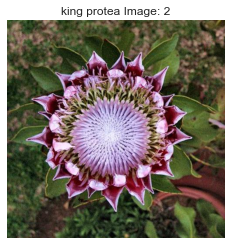

In [19]:
show_im(cat_num=13,im_no=2,dataset='valid')

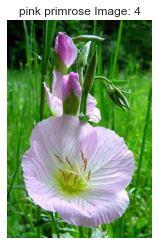

In [20]:
show_im(cat_num=1,im_no=4,dataset='valid',print_dim=False)

In [21]:
def flower_pics(cat_num=3,no_im=5,dataset='train',print_dim=True):
    no_examp1 = no_examples(cat_num,print_bool=False,dataset=dataset)
    assert no_im<=no_examp1, f"Image number out of range, should be less than {no_examp1}"
    
    for image_flower in range(no_im):
        show_im(cat_num=cat_num,im_no=1+image_flower,dataset=dataset,print_dim=print_dim)

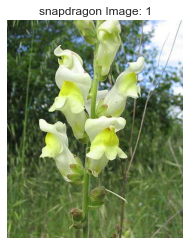

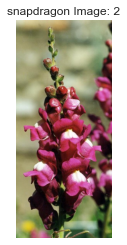

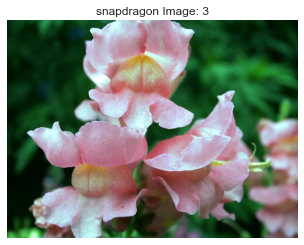

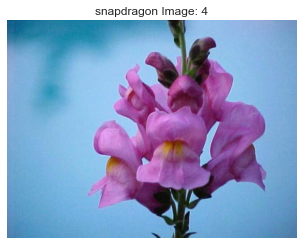

In [22]:
flower_pics(cat_num=11,no_im=4,dataset='valid',print_dim=False)

In [23]:
def im_path(cat_num=1,dataset='train'):
    root_dir = '.'
    cat_path = os.path.join(root_dir,dataset,str(cat_num))
    im_path = [os.path.join(cat_path,name) for name in os.listdir(cat_path)]
    width = []
    height = []
    for im in im_path:
        image = read_image(im)
        image = image.numpy().transpose((1, 2, 0))
        width.append(image.shape[0])
        height.append(image.shape[1])
    return {'width':width,'height':height}

    

In [24]:
width = []
height = []
for cat_num in range(1,103):
    dic = im_path(cat_num=cat_num)
    width.append(dic['width'])
    height.append(dic['height'])
    
    

<AxesSubplot:>

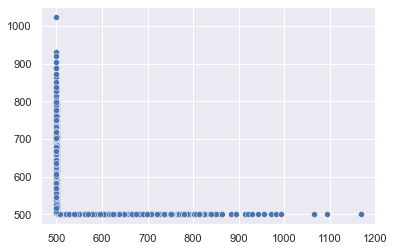

In [35]:
flatt_height=[]
flatt_width = []
for x in width:
    for y in x:
        flatt_width.append(y)
        
for x in height:
    for y in x:
        flatt_height.append(y)
df = pd.DataFrame(data=[flatt_width,flatt_height]).transpose()        
sns.set()
sns.scatterplot(x = flatt_width,y=flatt_height,data=df)